In [53]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
hist_labelcounts_neurips.pdf
INS-W_1_sleep_step_screen_allday_100_participants.csv
INS-W_2_sleep_step_screen_allday_100_participants.csv
INS-W_2_sleep_step_screen_allday_15_participants.csv
INS-W_2_sleep_step_screen_allday_50_participants.csv
INS-W_3_sleep_step_screen_allday_100_participants.csv
INS-W_3_sleep_step_screen_allday_15_participants.csv
INS-W_4_sleep_step_screen_allday_100_participants.csv
INS-W_4_sleep_step_screen_allday_15_participants.csv
sleep_duration_line_plot.pdf
sleep_duration_plot.pdf
sleep_step_screen_allday_15_participants_INS_W1.csv


In [38]:
%cd '/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset'

/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset


In [58]:
# prompt: write a code to read this csv /content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/sleep_step_screen_allday_15_participants.csv

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/CSE 570 Wireless Project/final_dataset/INS-W_1_sleep_step_screen_allday_100_participants.csv')


In [4]:
print(len(df.columns))

199


In [55]:




# Calculate the threshold for dropping columns (60% null values)
threshold = 0.2 * len(df)

# Drop columns where the number of null values exceeds the threshold
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Display the cleaned dataframe's columns
print(len(df_cleaned.columns))


196


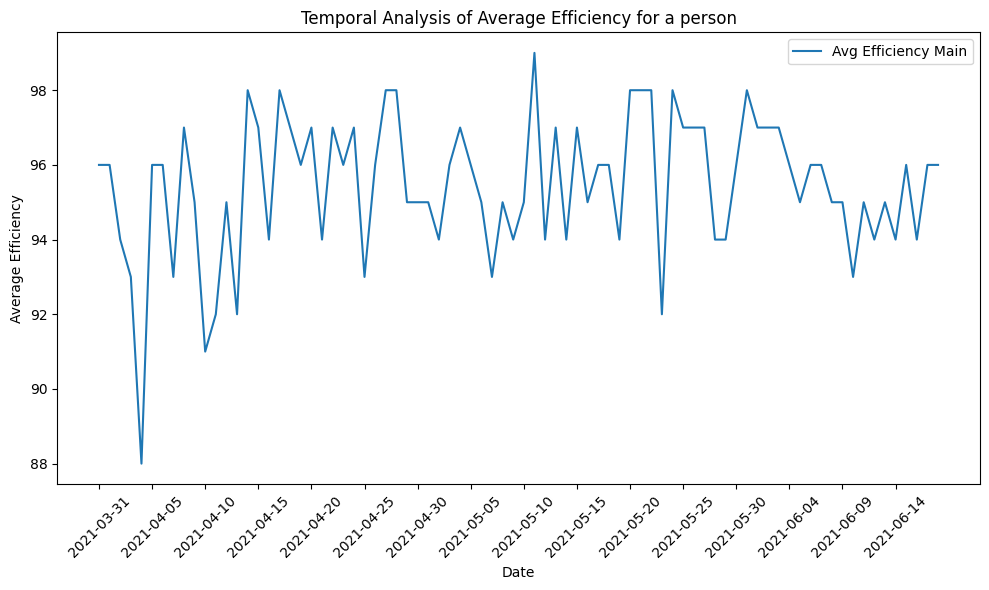

In [56]:

sleep_data=df.copy()
# Filter data for the first 'pid'
pid_data = sleep_data[sleep_data['pid'] == sleep_data['pid'].iloc[500]]

# Aggregate over the 'pid' by taking mean of avgefficiency columns for each date
agg_pid_data = pid_data.groupby('date')[['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
                                         'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday']].mean()

# Plot the temporal analysis of avgefficiency for the first 'pid'
plt.figure(figsize=(10,6))
plt.plot(agg_pid_data.index, agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'], label='Avg Efficiency Main')
#plt.plot(agg_pid_data.index, agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday'], label='Avg Efficiency Main Norm')
plt.title('Temporal Analysis of Average Efficiency for a person')
plt.xlabel('Date')
plt.ylabel('Average Efficiency')
plt.legend()

# Limit the number of x-axis ticks for better readability
plt.xticks(agg_pid_data.index[::5], rotation=45)
plt.tight_layout()
plt.show()


Mean Sleep Efficiency for PID INS-W_012#INS-W_1: 88.48


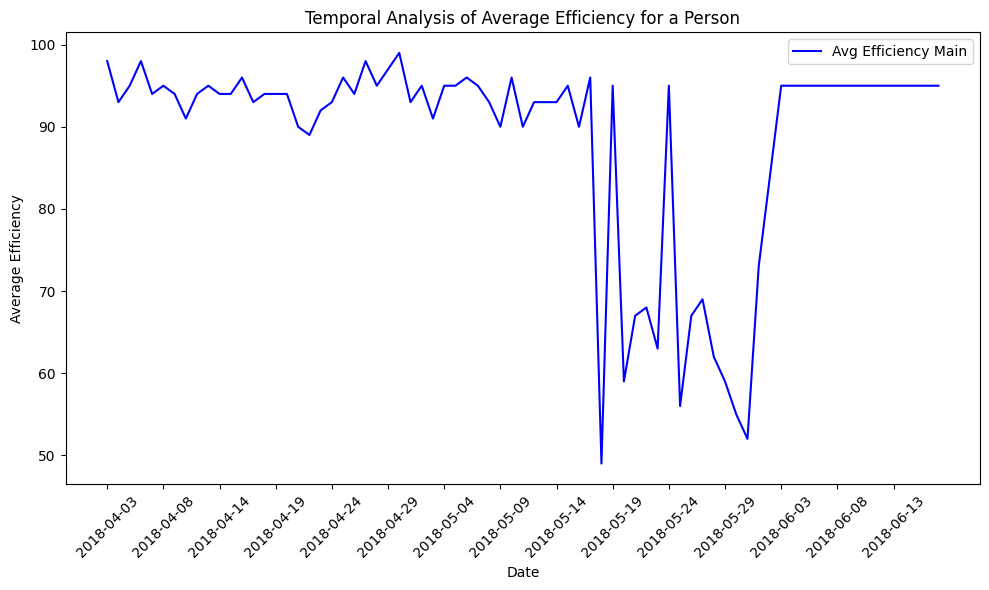

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'sleep_data' is your dataset
sleep_data = df.copy()

# Filter data for the specific 'pid' (the 500th participant in the dataset)
pid_data = sleep_data[sleep_data['pid'] == sleep_data['pid'].iloc[400]]

# Aggregate over the 'pid' by taking mean of avgefficiency columns for each date
agg_pid_data = pid_data.groupby('date')[['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday',
                                         'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday']].mean()

# Calculate the overall mean of the sleep efficiency
mean_sleep_efficiency = agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].mean()

# Print the mean sleep efficiency
print(f"Mean Sleep Efficiency for PID {pid_data['pid'].iloc[0]}: {mean_sleep_efficiency:.2f}")

# Plot the temporal analysis of avgefficiency for the specific 'pid'
plt.figure(figsize=(10,6))
plt.plot(agg_pid_data.index, agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'], label='Avg Efficiency Main', color='blue')
#plt.plot(agg_pid_data.index, agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain_norm:allday'], label='Avg Efficiency Main Norm')

plt.title('Temporal Analysis of Average Efficiency for a Person')
plt.xlabel('Date')
plt.ylabel('Average Efficiency')
plt.legend()

# Limit the number of x-axis ticks for better readability
plt.xticks(agg_pid_data.index[::5], rotation=45)
plt.tight_layout()
plt.show()


In [61]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Select a valid subset of non-sleep-related columns
subset_columns = [
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday'
]

# Impute missing values with the median for these columns
filtered_imputed_subset = sleep_data[subset_columns].fillna(sleep_data[subset_columns].median())

# Ensure the sleep efficiency column is correctly aligned and impute its missing values
sleep_efficiency = sleep_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].fillna(sleep_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].median())

# Concatenate the sleep efficiency and non-sleep-related columns
final_filtered_data = pd.concat([sleep_efficiency, filtered_imputed_subset], axis=1)

# Recalculate correlations and mutual information
spearman_corr = final_filtered_data.corr(method='spearman')['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].dropna()
kendall_corr = final_filtered_data.corr(method='kendall')['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].dropna()

# Calculate Mutual Information
mutual_info = mutual_info_regression(final_filtered_data[subset_columns], final_filtered_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'])
mutual_info_series = pd.Series(mutual_info, index=subset_columns).sort_values(ascending=False)

# Combine results
correlation_results = pd.DataFrame({
    'Spearman': spearman_corr,
    'Kendall': kendall_corr,
    'Mutual Information': mutual_info_series
}).sort_values(by='Mutual Information', ascending=False)

# Show the top 10 correlations
print(correlation_results.head(10))


                                                    Spearman   Kendall  \
f_steps:fitbit_steps_summary_rapids_avgsumsteps...  0.000944  0.000537   
f_steps:fitbit_steps_summary_rapids_minsumsteps...  0.000944  0.000537   
f_steps:fitbit_steps_intraday_rapids_avgduratio... -0.015388 -0.012859   
f_screen:phone_screen_rapids_avgdurationunlock:... -0.124824 -0.090858   
f_slp:fitbit_sleep_summary_rapids_avgefficiency...  1.000000  1.000000   

                                                    Mutual Information  
f_steps:fitbit_steps_summary_rapids_avgsumsteps...            0.297330  
f_steps:fitbit_steps_summary_rapids_minsumsteps...            0.288915  
f_steps:fitbit_steps_intraday_rapids_avgduratio...            0.277636  
f_screen:phone_screen_rapids_avgdurationunlock:...            0.015500  
f_slp:fitbit_sleep_summary_rapids_avgefficiency...                 NaN  


In [62]:


# Ensure the 'date' column is in datetime format
sleep_data['date'] = pd.to_datetime(sleep_data['date'])

# Extract day of the week (0 = Monday, ..., 6 = Sunday)
sleep_data['day_of_week'] = sleep_data['date'].dt.dayofweek

# Mark weekdays (0-4) and weekends (5-6)
sleep_data['is_weekend'] = np.where(sleep_data['day_of_week'] >= 5, 1, 0)

# Group by 'pid' and 'date' to handle multiple rows per participant per date
grouped_sleep_data = sleep_data.groupby(['pid', 'date']).mean().reset_index()

# Calculate mean sleep efficiency for weekdays and weekends
mean_weekday_sleep_efficiency = grouped_sleep_data[grouped_sleep_data['is_weekend'] == 0]['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].mean()
mean_weekend_sleep_efficiency = grouped_sleep_data[grouped_sleep_data['is_weekend'] == 1]['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].mean()

# Display the results
print(f"Mean Weekday Sleep Efficiency: {mean_weekday_sleep_efficiency}")
print(f"Mean Weekend Sleep Efficiency: {mean_weekend_sleep_efficiency}")


Mean Weekday Sleep Efficiency: 94.18630058901768
Mean Weekend Sleep Efficiency: 94.23317073170732


# Lagged Correlation with steps


In [63]:


# Ensure the 'date' column is in datetime format
sleep_data['date'] = pd.to_datetime(sleep_data['date'])

# Sort data by 'pid' and 'date' to ensure proper time-series alignment
sleep_data = sleep_data.sort_values(by=['pid', 'date'])

# Create lagged versions of the step count feature
sleep_data['lagged_steps_1day'] = sleep_data.groupby('pid')['f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday'].shift(1)
sleep_data['lagged_steps_2days'] = sleep_data.groupby('pid')['f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday'].shift(2)
sleep_data['lagged_steps_3days'] = sleep_data.groupby('pid')['f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday'].shift(3)

# Calculate the correlation between sleep efficiency and lagged steps
corr_1day = sleep_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].corr(sleep_data['lagged_steps_1day'])
corr_2days = sleep_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].corr(sleep_data['lagged_steps_2days'])
corr_3days = sleep_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].corr(sleep_data['lagged_steps_3days'])

# Display the cross-correlations
print(f"Correlation between steps 1 day earlier and sleep efficiency: {corr_1day}")
print(f"Correlation between steps 2 days earlier and sleep efficiency: {corr_2days}")
print(f"Correlation between steps 3 days earlier and sleep efficiency: {corr_3days}")


Correlation between steps 1 day earlier and sleep efficiency: -0.004413755562161393
Correlation between steps 2 days earlier and sleep efficiency: -0.007884028659638637
Correlation between steps 3 days earlier and sleep efficiency: -0.0022481762239239403


In [64]:
from sklearn.feature_selection import mutual_info_regression

# Drop any rows with missing values for this analysis
sleep_data_nonnull = sleep_data[['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday', 'lagged_steps_1day', 'lagged_steps_2days', 'lagged_steps_3days']].dropna()

# Features (lagged steps)
X = sleep_data_nonnull[['lagged_steps_1day', 'lagged_steps_2days', 'lagged_steps_3days']]

# Target (sleep efficiency)
y = sleep_data_nonnull['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday']

# Calculate Mutual Information between lagged steps and sleep efficiency
mi = mutual_info_regression(X, y)

# Display Mutual Information for each lag
for i, lag in enumerate(['1 day earlier', '2 days earlier', '3 days earlier']):
    print(f"Mutual Information between steps {lag} and sleep efficiency: {mi[i]}")


Mutual Information between steps 1 day earlier and sleep efficiency: 0.21955337483153947
Mutual Information between steps 2 days earlier and sleep efficiency: 0.20116879155701906
Mutual Information between steps 3 days earlier and sleep efficiency: 0.16045723229575515


In [65]:
# List all available columns in the dataset
available_columns = sleep_data.columns
print(available_columns)


Index(['pid', 'date', 'f_screen:phone_screen_rapids_avgdurationunlock:allday',
       'f_screen:phone_screen_rapids_avgdurationunlock_locmap_exercise:allday',
       'f_screen:phone_screen_rapids_avgdurationunlock_locmap_exercise_norm:allday',
       'f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday',
       'f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens_norm:allday',
       'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
       'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home_norm:allday',
       'f_screen:phone_screen_rapids_avgdurationunlock_locmap_living:allday',
       ...
       'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
       'f_steps:fitbit_steps_summary_rapids_minsumsteps_norm:allday',
       'f_steps:fitbit_steps_summary_rapids_stdsumsteps:allday',
       'f_steps:fitbit_steps_summary_rapids_stdsumsteps_dis:allday',
       'f_steps:fitbit_steps_summary_rapids_stdsumsteps_norm:allday',
       'da

In [66]:
# List of additional columns to explore
additional_columns = [
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',  # Average duration of active bouts
     # Total duration of active bouts
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',  # Average screen unlock duration
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',  # Screen unlock duration at home
     # Average sedentary bouts
]

# Impute missing values with the median for these columns
filtered_imputed_additional = sleep_data[additional_columns].fillna(sleep_data[additional_columns].median())

# Concatenate the sleep efficiency and the additional columns
final_data_additional = pd.concat([sleep_efficiency, filtered_imputed_additional], axis=1)

# Calculate the Spearman and Kendall correlations
spearman_corr_additional = final_data_additional.corr(method='spearman')['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].dropna()
kendall_corr_additional = final_data_additional.corr(method='kendall')['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].dropna()

# Display the results
print("Spearman Correlation:")
print(spearman_corr_additional)

print("\nKendall Correlation:")
print(kendall_corr_additional)


Spearman Correlation:
f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday           1.000000
f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday   -0.015388
f_screen:phone_screen_rapids_avgdurationunlock:allday               -0.124824
f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday   -0.114001
Name: f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday, dtype: float64

Kendall Correlation:
f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday           1.000000
f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday   -0.012859
f_screen:phone_screen_rapids_avgdurationunlock:allday               -0.090858
f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday   -0.083853
Name: f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday, dtype: float64


In [13]:
!pip3 install shap


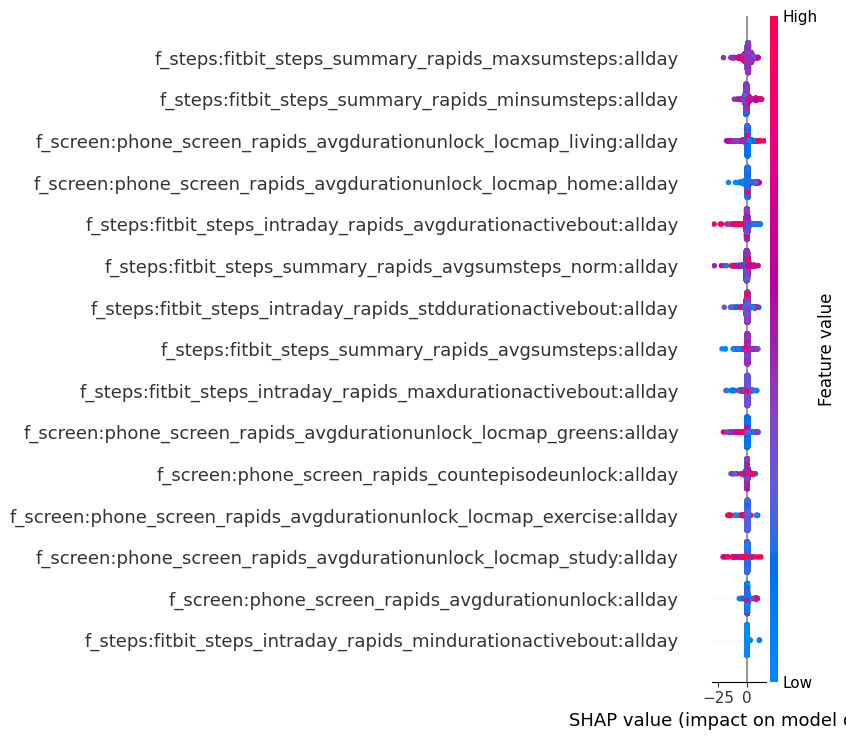

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import shap

# Define the 20 selected features
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_steps:fitbit_steps_intraday_rapids_maxdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_countepisodeunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_living:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_exercise:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_study:allday',
    'f_steps:fitbit_steps_intraday_rapids_stddurationactivebout:allday',
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps_norm:allday',
    'f_steps:fitbit_steps_intraday_rapids_mindurationactivebout:allday'
]

# Prepare the data
X = sleep_data[selected_features].fillna(sleep_data[selected_features].median())  # Feature matrix
y = sleep_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].fillna(sleep_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].median())

# Train the Decision Tree model
model = DecisionTreeRegressor()
model.fit(X, y)

# Create a SHAP explainer
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Plot the SHAP summary to see feature importance
shap.summary_plot(shap_values, X)


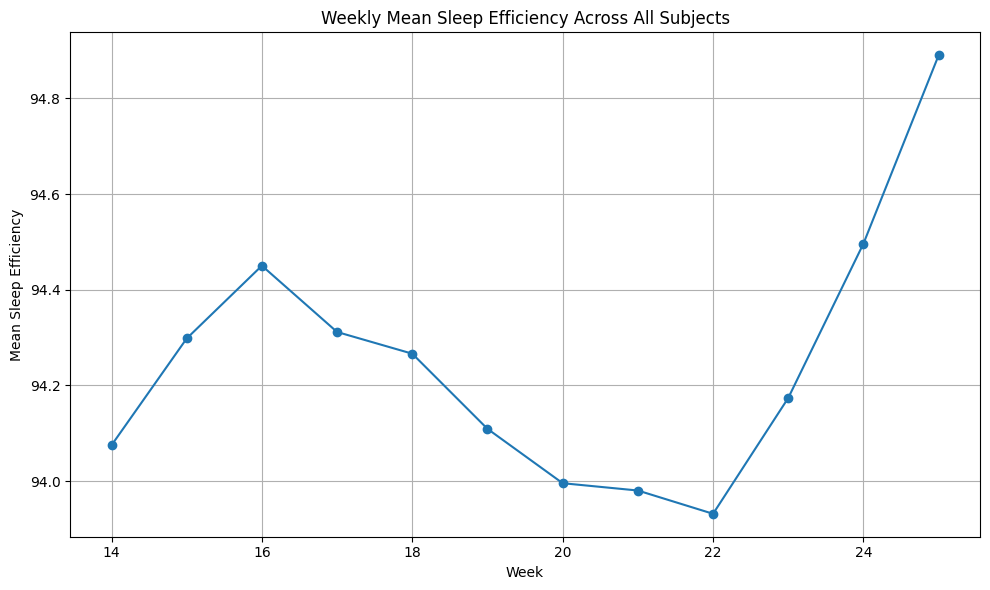

In [68]:
sleep_data['date'] = pd.to_datetime(sleep_data['date'])

sleep_data['week'] = sleep_data['date'].dt.isocalendar().week

# Group by 'week' and calculate the mean sleep efficiency across all subjects
weekly_mean_sleep_efficiency = sleep_data.groupby('week')['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].mean()

# Plot the weekly mean of sleep efficiency
plt.figure(figsize=(10, 6))
plt.plot(weekly_mean_sleep_efficiency, marker='o', linestyle='-')
plt.title('Weekly Mean Sleep Efficiency Across All Subjects')
plt.xlabel('Week')
plt.ylabel('Mean Sleep Efficiency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
# Filter data for participants with sleep efficiency less than 85%
low_efficiency_data = sleep_data[sleep_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'] < 85]

# Display the number of participants with low sleep efficiency
low_efficiency_participants = low_efficiency_data['pid'].unique()
print(f"Number of participants with sleep efficiency < 85%: {len(low_efficiency_participants)}")


Number of participants with sleep efficiency < 85%: 17


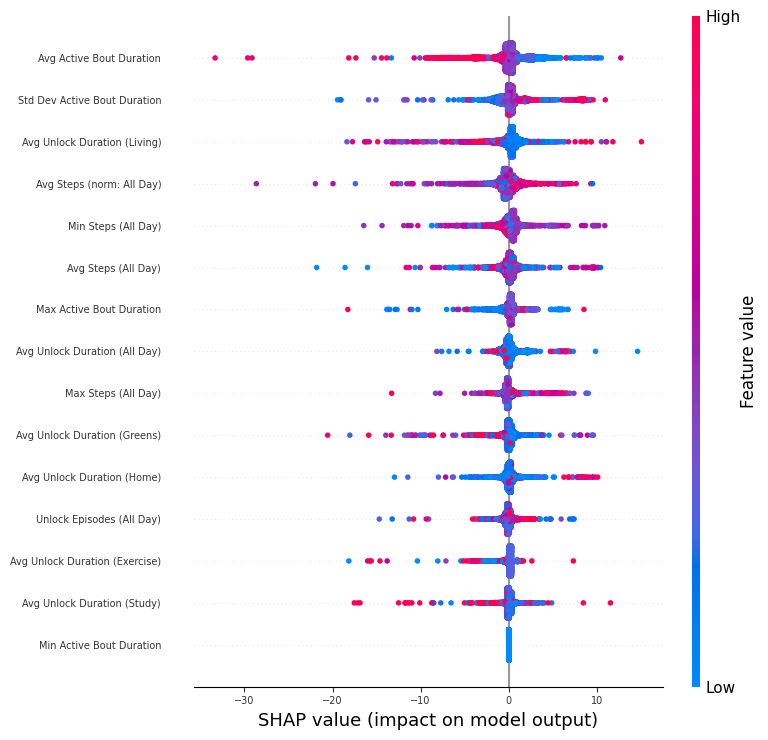

Top 7 Features: ['Avg Active Bout Duration', 'Std Dev Active Bout Duration', 'Avg Unlock Duration (Living)', 'Avg Steps (norm: All Day)', 'Min Steps (All Day)', 'Avg Steps (All Day)', 'Max Active Bout Duration']


In [73]:
import shap
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Define the original 20 selected features (or however many you are using)
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_steps:fitbit_steps_intraday_rapids_maxdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_countepisodeunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_living:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_exercise:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_study:allday',
    'f_steps:fitbit_steps_intraday_rapids_stddurationactivebout:allday',
    'f_steps:fitbit_steps_intraday_rapids_mindurationactivebout:allday'
]

# Create a dictionary to map the long feature names to shorter, more intuitive names
feature_name_map = {
    'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday': 'Max Steps (All Day)',
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday': 'Min Steps (All Day)',
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday': 'Avg Steps (All Day)',
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps_norm:allday': 'Avg Steps (norm: All Day)',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday': 'Avg Active Bout Duration',
    'f_steps:fitbit_steps_intraday_rapids_maxdurationactivebout:allday': 'Max Active Bout Duration',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday': 'Avg Unlock Duration (All Day)',
    'f_screen:phone_screen_rapids_countepisodeunlock:allday': 'Unlock Episodes (All Day)',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday': 'Avg Unlock Duration (Home)',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_living:allday': 'Avg Unlock Duration (Living)',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_exercise:allday': 'Avg Unlock Duration (Exercise)',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday': 'Avg Unlock Duration (Greens)',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_study:allday': 'Avg Unlock Duration (Study)',
    'f_steps:fitbit_steps_intraday_rapids_stddurationactivebout:allday': 'Std Dev Active Bout Duration',
    'f_steps:fitbit_steps_intraday_rapids_mindurationactivebout:allday': 'Min Active Bout Duration'
}

# Replace feature names in the dataset with shorter names
X_renamed = X.rename(columns=feature_name_map)

# Train the Decision Tree model
model = DecisionTreeRegressor()
model.fit(X_renamed, y)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_renamed)
shap_values = explainer(X_renamed)

# Increase the figure size and decrease font size
plt.figure(figsize=(6, 10))  # Increase the width and height of the figure
shap.summary_plot(shap_values, X_renamed, show=False)

# Reduce font size of feature names and labels
plt.gca().tick_params(labelsize=7)  # Decrease label font size to 7

# Save or show the plot
plt.tight_layout()
plt.show()

# Extract mean absolute SHAP values for each feature and sort them
shap_importance = pd.DataFrame({
    'Feature': X_renamed.columns,
    'Importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Importance', ascending=False)

# Display the top 7 most important features with shorter names
top_7_features = shap_importance['Feature'].head(7).tolist()
print("Top 7 Features:", top_7_features)


<ipython-input-76-f58e570b663d>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=shap_importance, palette='coolwarm')


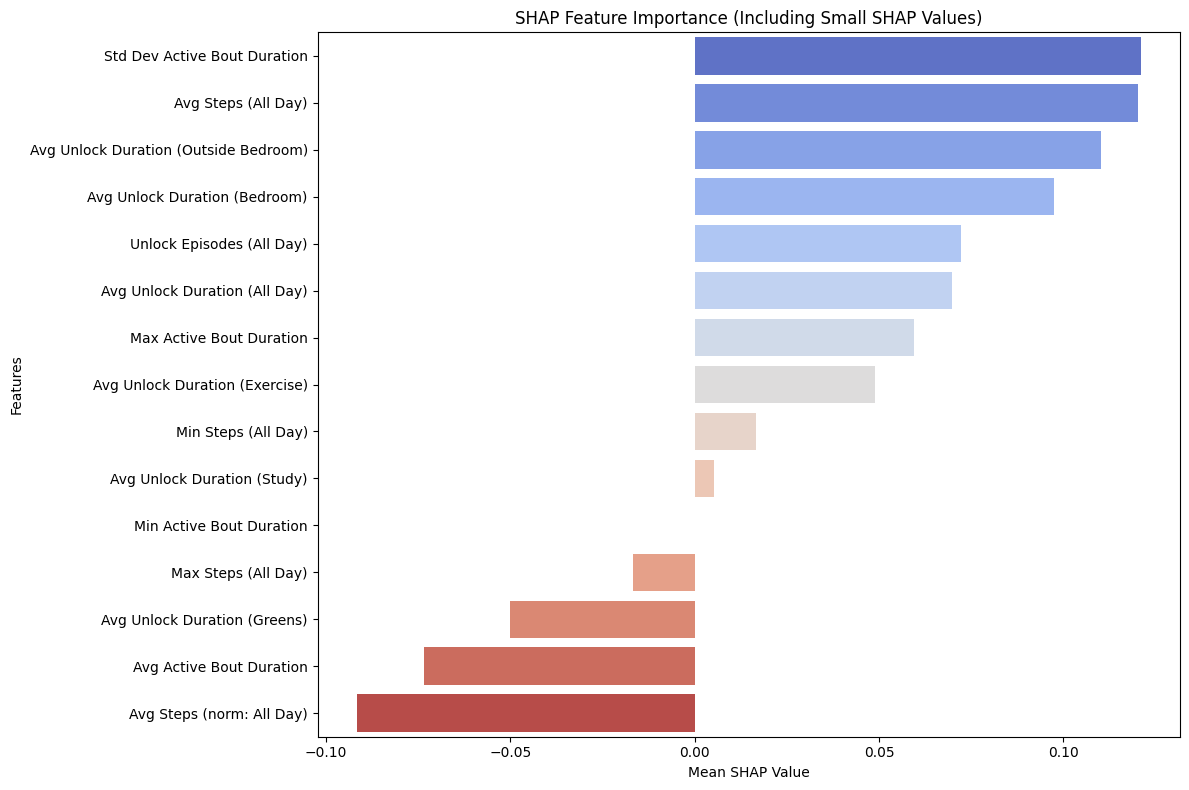

Top 7 Features: ['Std Dev Active Bout Duration', 'Avg Steps (All Day)', 'Avg Unlock Duration (Outside Bedroom)', 'Avg Unlock Duration (Bedroom)', 'Unlock Episodes (All Day)', 'Avg Unlock Duration (All Day)', 'Max Active Bout Duration']


In [76]:
import shap
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Define the original selected features
# Define the original 20 selected features (or however many you are using)
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_steps:fitbit_steps_intraday_rapids_maxdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_countepisodeunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_living:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_exercise:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_study:allday',
    'f_steps:fitbit_steps_intraday_rapids_stddurationactivebout:allday',
    'f_steps:fitbit_steps_intraday_rapids_mindurationactivebout:allday'
]

# Create a dictionary to map the long feature names to shorter, more intuitive names
feature_name_map = {
    'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday': 'Max Steps (All Day)',
    'f_steps:fitbit_steps_summary_rapids_minsumsteps:allday': 'Min Steps (All Day)',
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday': 'Avg Steps (All Day)',
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps_norm:allday': 'Avg Steps (norm: All Day)',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday': 'Avg Active Bout Duration',
    'f_steps:fitbit_steps_intraday_rapids_maxdurationactivebout:allday': 'Max Active Bout Duration',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday': 'Avg Unlock Duration (All Day)',
    'f_screen:phone_screen_rapids_countepisodeunlock:allday': 'Unlock Episodes (All Day)',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday': 'Avg Unlock Duration (Bedroom)',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_living:allday': 'Avg Unlock Duration (Outside Bedroom)',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_exercise:allday': 'Avg Unlock Duration (Exercise)',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday': 'Avg Unlock Duration (Greens)',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_study:allday': 'Avg Unlock Duration (Study)',
    'f_steps:fitbit_steps_intraday_rapids_stddurationactivebout:allday': 'Std Dev Active Bout Duration',
    'f_steps:fitbit_steps_intraday_rapids_mindurationactivebout:allday': 'Min Active Bout Duration'
}

# Replace feature names in the dataset with shorter names
X_renamed = X.rename(columns=feature_name_map)

# Train the Decision Tree model
model = DecisionTreeRegressor()
model.fit(X_renamed, y)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_renamed)
shap_values = explainer(X_renamed)

# Extract mean SHAP values for each feature and sort them
shap_importance = pd.DataFrame({
    'Feature': X_renamed.columns,
    'Importance': shap_values.values.mean(axis=0)  # Keep both positive and negative SHAP values
}).sort_values(by='Importance', ascending=False)

# Force display of very small values by adjusting figure size and resolution
plt.figure(figsize=(12, 8))  # Increase the figure size to fit all features
sns.barplot(x='Importance', y='Feature', data=shap_importance, palette='coolwarm')

# Customize the plot
plt.title('SHAP Feature Importance (Including Small SHAP Values)')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Features')

# Ensure that small values are visible by adjusting layout
plt.tight_layout()
plt.show()

# Display the top 7 most important features (optional)
top_7_features = shap_importance['Feature'].head(7).tolist()
print("Top 7 Features:", top_7_features)


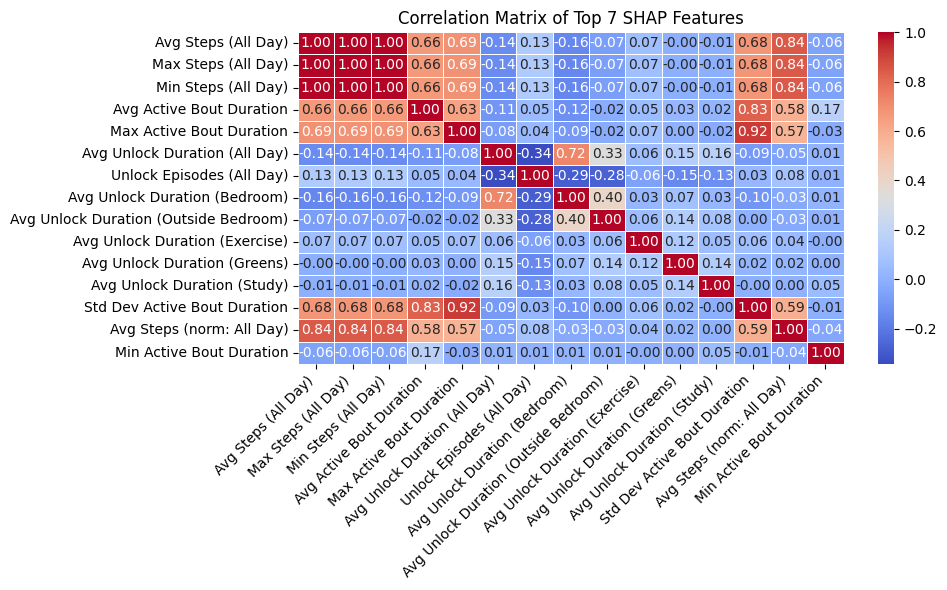

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume X_renamed and shap_importance have been calculated as in the SHAP code above

# Extract the top 7 features based on SHAP importance
# top_7_features = shap_importance['Feature'].head(7).tolist()

X_renamed = X.rename(columns=feature_name_map)

# Extract the data for the top 7 features
df_top_7 = X_renamed #[top_7_features]

# Compute the correlation matrix for the top 7 features
corr_matrix_top_7 = df_top_7.corr()

# Set up the matplotlib figure for the correlation heatmap
plt.figure(figsize=(10, 6))

# Generate the heatmap for the top 7 features' correlation matrix
sns.heatmap(corr_matrix_top_7, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the heatmap
plt.title('Correlation Matrix of Top 7 SHAP Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Show the heatmap
plt.tight_layout()
plt.show()


In [18]:
# top_7_features = [


#     'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
#     'f_screen:phone_screen_rapids_avgdurationunlock:allday',
#     'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
#     'f_screen:phone_screen_rapids_countepisodeunlock:allday',
#     'f_steps:fitbit_steps_summary_rapids_maxsumsteps:allday',
#     'f_steps:fitbit_steps_intraday_rapids_maxdurationactivebout:allday',
#     'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday'
# ]
top_7_features = ['f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
                  'f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday',
                  'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday'  ,
                  'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
                  'f_screen:phone_screen_rapids_avgdurationunlock:allday',
                  'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday']
# Ensure 'date' is in datetime format and data is sorted by 'pid' and 'date'
sleep_data['date'] = pd.to_datetime(sleep_data['date'])
sleep_data = sleep_data.sort_values(by=['pid', 'date'])

# Step 1: Calculate sleep efficiency change (nth day vs n+1th day)
sleep_data['sleep_efficiency_diff'] = sleep_data.groupby('pid')['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].diff()

# Step 2: Filter out only the drops in sleep efficiency
sleep_drop_data = sleep_data[sleep_data['sleep_efficiency_diff'] < 0]

# Initialize a dictionary to store the deviation of features
feature_deviation = {feature: [] for feature in top_7_features}

# Step 3: Find the days with the largest drops in sleep efficiency
# For each participant, find the largest drops in sleep efficiency
for pid in sleep_drop_data['pid'].unique():
    # Filter data for this participant
    participant_data = sleep_drop_data[sleep_drop_data['pid'] == pid]

    # Identify the largest drop in sleep efficiency for this participant
    max_drop_idx = participant_data['sleep_efficiency_diff'].idxmin()  # Index of largest drop

    # Ensure there is a previous day to compare with (n-th and n+1-th day)
    if max_drop_idx - 1 in participant_data.index:
        # Calculate deviation for the top 7 features on the largest drop
        for feature in top_7_features:
            # Calculate the deviation for this feature between the n-th day and the n+1-th day
            deviation = abs(participant_data[feature].loc[max_drop_idx] - participant_data[feature].loc[max_drop_idx - 1])
            feature_deviation[feature].append(deviation)

# Step 4: Calculate the mean deviation for each feature
mean_feature_deviation = {feature: np.mean(deviations) for feature, deviations in feature_deviation.items()}

# Output the results
print("Mean Deviation of Top 7 Features for Largest Sleep Efficiency Drops:")
for feature, mean_deviation in mean_feature_deviation.items():
    print(f"{feature}: {mean_deviation}")


Mean Deviation of Top 7 Features for Largest Sleep Efficiency Drops:
f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday: 3151.9166666666665
f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday: 1.3687437444115431
f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday: 2.904679469002169
f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday: 0.5040804311794674
f_screen:phone_screen_rapids_avgdurationunlock:allday: 1.5574442206290442


In [19]:
from scipy.stats import ttest_ind
deviations_drop = {feature: [] for feature in top_7_features}
deviations_normal = {feature: [] for feature in top_7_features}

# Iterate over each participant (pid)
for pid in sleep_data['pid'].unique():
    participant_data = sleep_data[sleep_data['pid'] == pid].sort_values(by='date')

    # Calculate sleep efficiency change (nth day vs n+1th day)
    participant_data['sleep_efficiency_diff'] = participant_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].diff()

    # Iterate through each row for n-th and n+1-th day pairs
    for i in range(1, len(participant_data)):
        is_drop = participant_data['sleep_efficiency_diff'].iloc[i] < -2

        # Store deviations in the respective list
        for feature in top_7_features:
            deviation = abs(participant_data[feature].iloc[i] - participant_data[feature].iloc[i-1])
            if is_drop:
                deviations_drop[feature].append(deviation)
            else:
                deviations_normal[feature].append(deviation)

# Convert lists to numpy arrays for the t-test
deviations_drop_combined = np.array([item for sublist in deviations_drop.values() for item in sublist])
deviations_normal_combined = np.array([item for sublist in deviations_normal.values() for item in sublist])

print(f"Length of deviations_drop_combined: {len(deviations_drop_combined)}")
print(f"Length of deviations_normal_combined: {len(deviations_normal_combined)}")

# Perform a t-test to compare deviations on drop days vs. normal days
t_stat, p_value = ttest_ind(deviations_drop_combined, deviations_normal_combined)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in deviations during sleep efficiency drops.")
else:
    print("No significant difference in deviations during sleep efficiency drops.")


Length of deviations_drop_combined: 6786
Length of deviations_normal_combined: 36492
T-statistic: 9.739677589181193, P-value: 2.1531532297471287e-22
There is a significant difference in deviations during sleep efficiency drops.


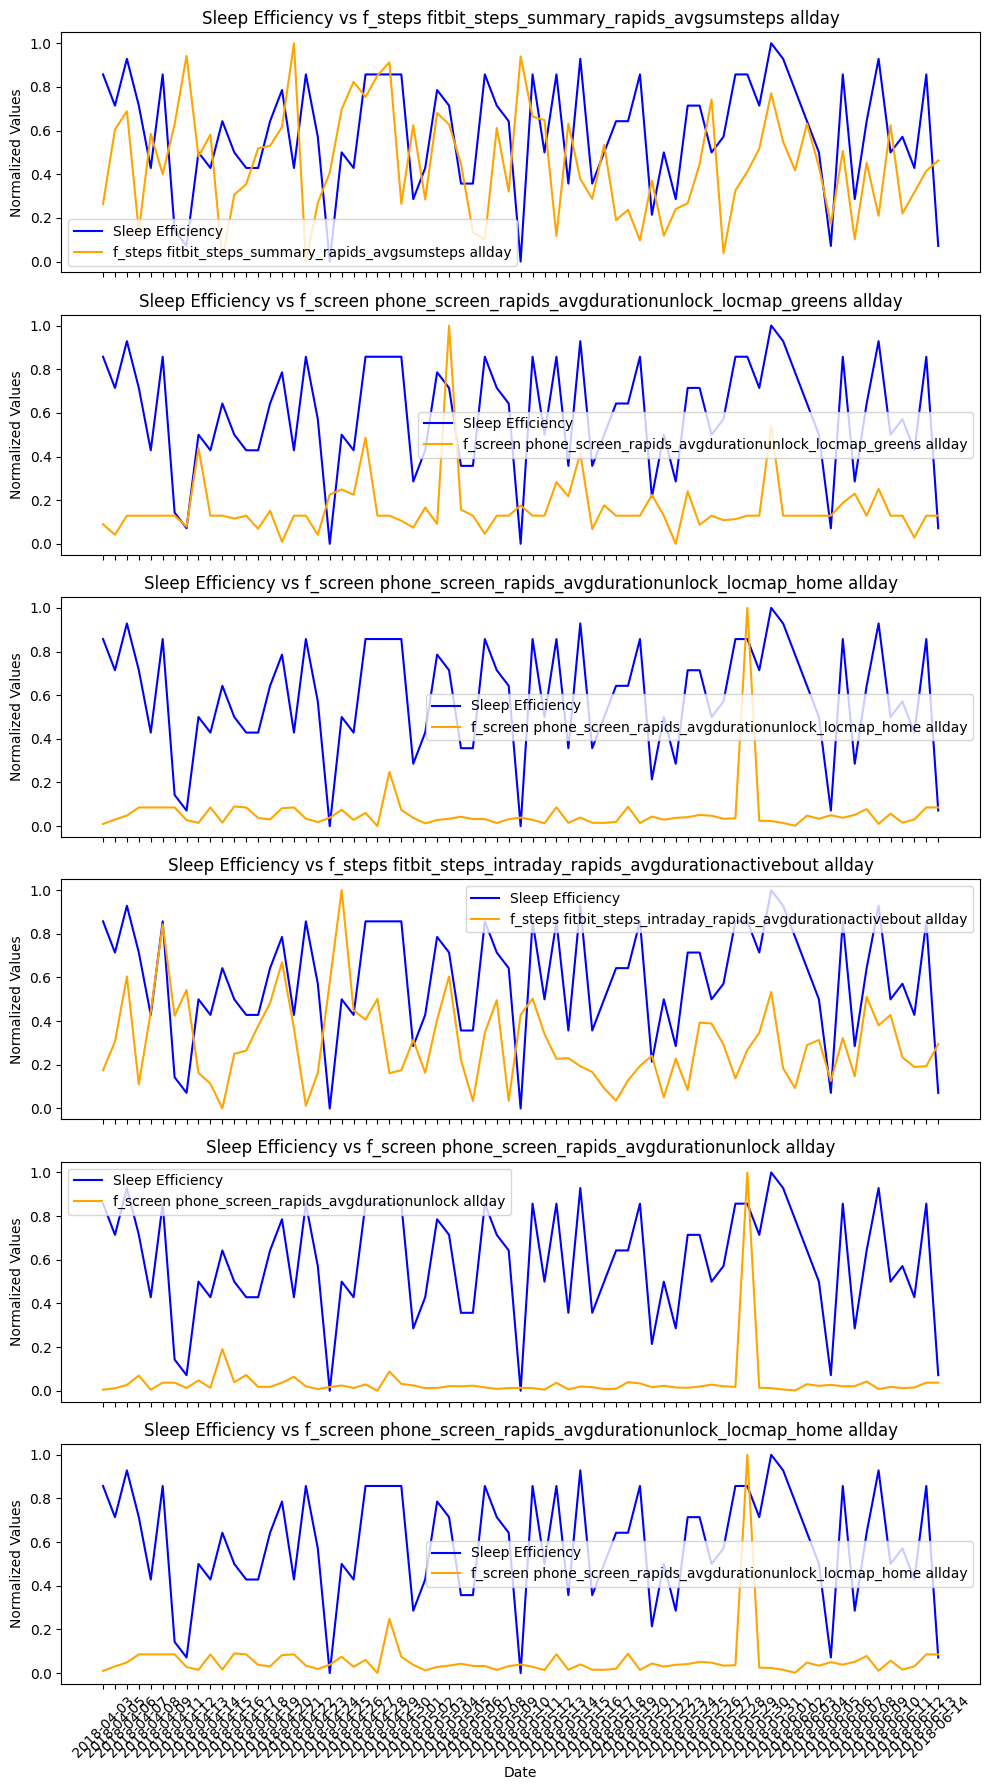

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to normalize data (min-max normalization)
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Assuming 'sleep_data' is your dataset, making a copy as per your request
sleep_data = df.copy()

# Filter data for the first 'pid'
pid_data = sleep_data[sleep_data['pid'] == sleep_data['pid'].iloc[500]]

# Define the top 6 features (provided)
top_6_features = [
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday'
]

# Set up the subplot (6 subplots, one for each feature)
fig, axs = plt.subplots(len(top_6_features), 1, figsize=(10, 18), sharex=True)

# Plot sleep efficiency along with each feature in the 6 subplots
for i, feature in enumerate(top_6_features):
    # Aggregate over the 'pid' by taking the mean of sleep efficiency and each feature for each date
    agg_pid_data = pid_data.groupby('date')[[feature, 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday']].mean()

    # Normalize both sleep efficiency and the feature
    agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'] = normalize(agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'])
    agg_pid_data[feature] = normalize(agg_pid_data[feature])

    # Plot sleep efficiency
    axs[i].plot(agg_pid_data.index, agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'], label='Sleep Efficiency', color='blue')

    # Plot the corresponding feature
    axs[i].plot(agg_pid_data.index, agg_pid_data[feature], label=feature.replace(':', ' '), color='orange')

    # Set title and labels
    axs[i].set_title(f'Sleep Efficiency vs {feature.replace(":", " ")}')
    axs[i].set_ylabel('Normalized Values')
    # axs[i].grid(True)
    axs[i].legend()

# Set common x-axis label
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


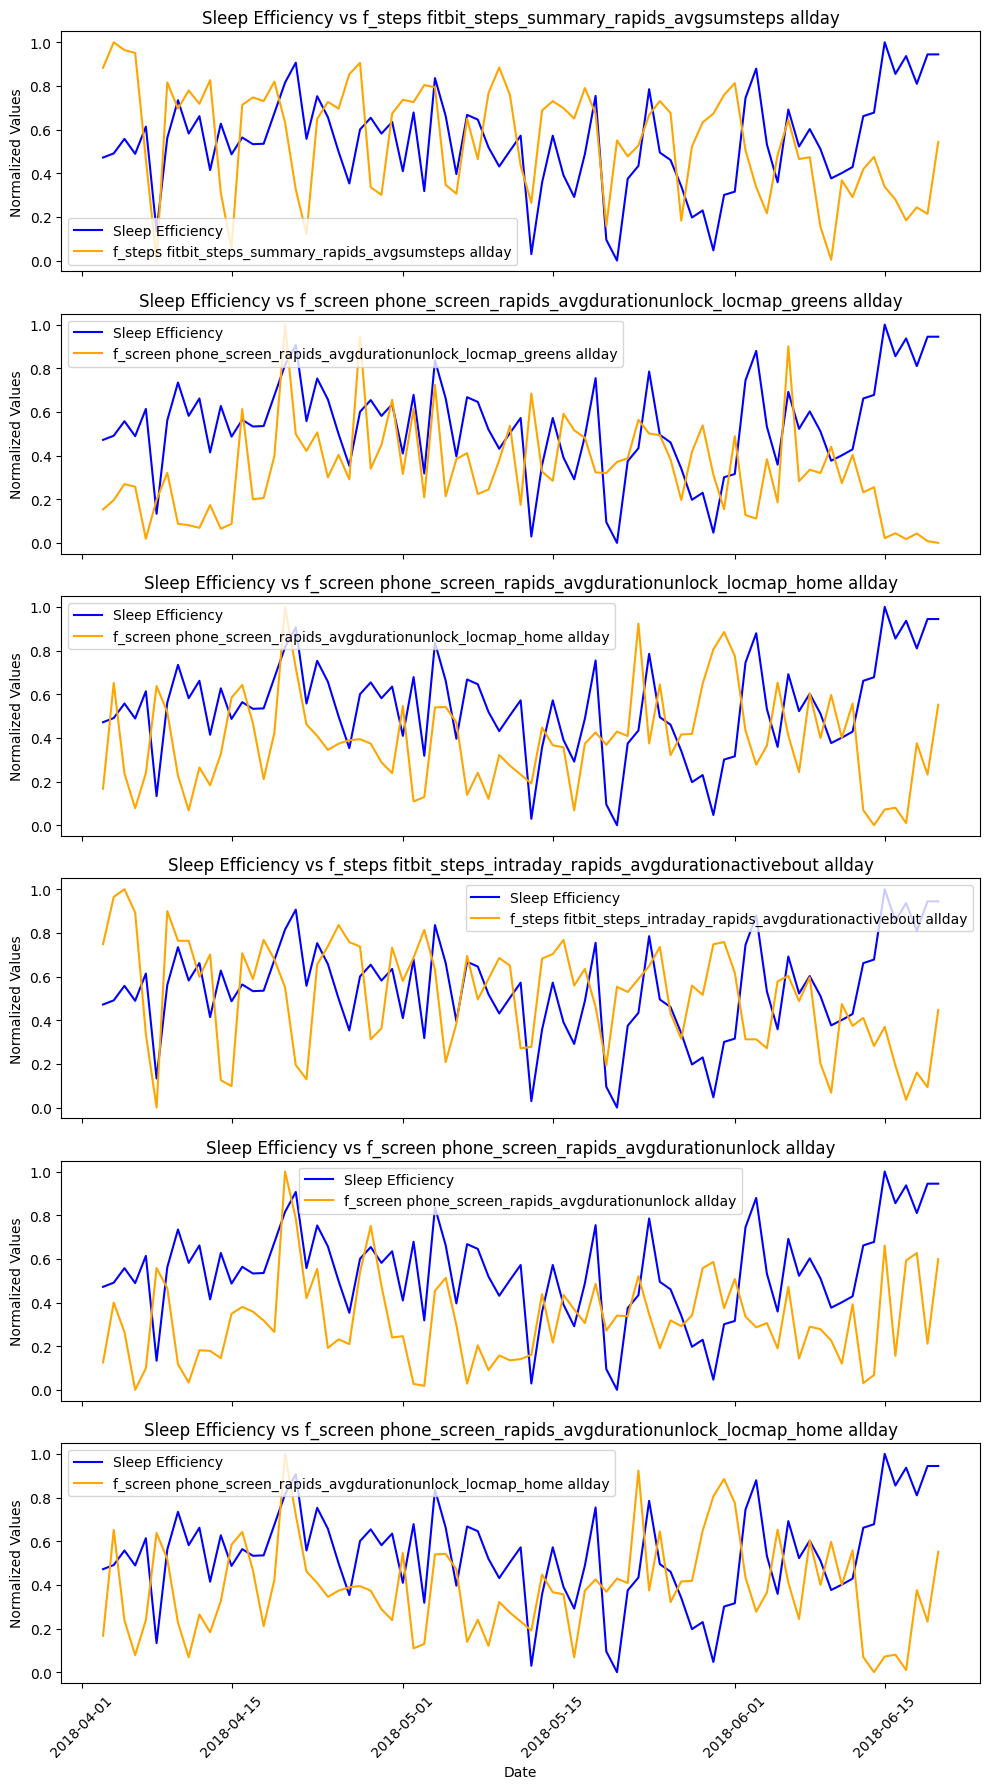

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to normalize data (min-max normalization)
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Assuming 'sleep_data' is your dataset, making a copy as per your request
sleep_data = df.copy()

# Define the top 6 features (provided)
top_6_features = [
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday'
]

# Ensure the 'date' column is in datetime format
sleep_data['date'] = pd.to_datetime(sleep_data['date'])

# Set up the subplot (6 subplots, one for each feature)
fig, axs = plt.subplots(len(top_6_features), 1, figsize=(10, 18), sharex=True)

# Plot sleep efficiency along with each feature in the 6 subplots
for i, feature in enumerate(top_6_features):
    # Aggregate by date across all participants, taking the mean of sleep efficiency and each feature
    agg_data = sleep_data.groupby('date')[[feature, 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday']].mean()

    # Normalize both sleep efficiency and the feature
    agg_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'] = normalize(agg_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'])
    agg_data[feature] = normalize(agg_data[feature])

    # Plot sleep efficiency
    axs[i].plot(agg_data.index, agg_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'], label='Sleep Efficiency', color='blue')

    # Plot the corresponding feature
    axs[i].plot(agg_data.index, agg_data[feature], label=feature.replace(':', ' '), color='orange')

    # Set title and labels
    axs[i].set_title(f'Sleep Efficiency vs {feature.replace(":", " ")}')
    axs[i].set_ylabel('Normalized Values')
    axs[i].legend()

# Set common x-axis label
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-22-1b37b602ef48>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pid_data['date'] = pd.to_datetime(pid_data['date'])


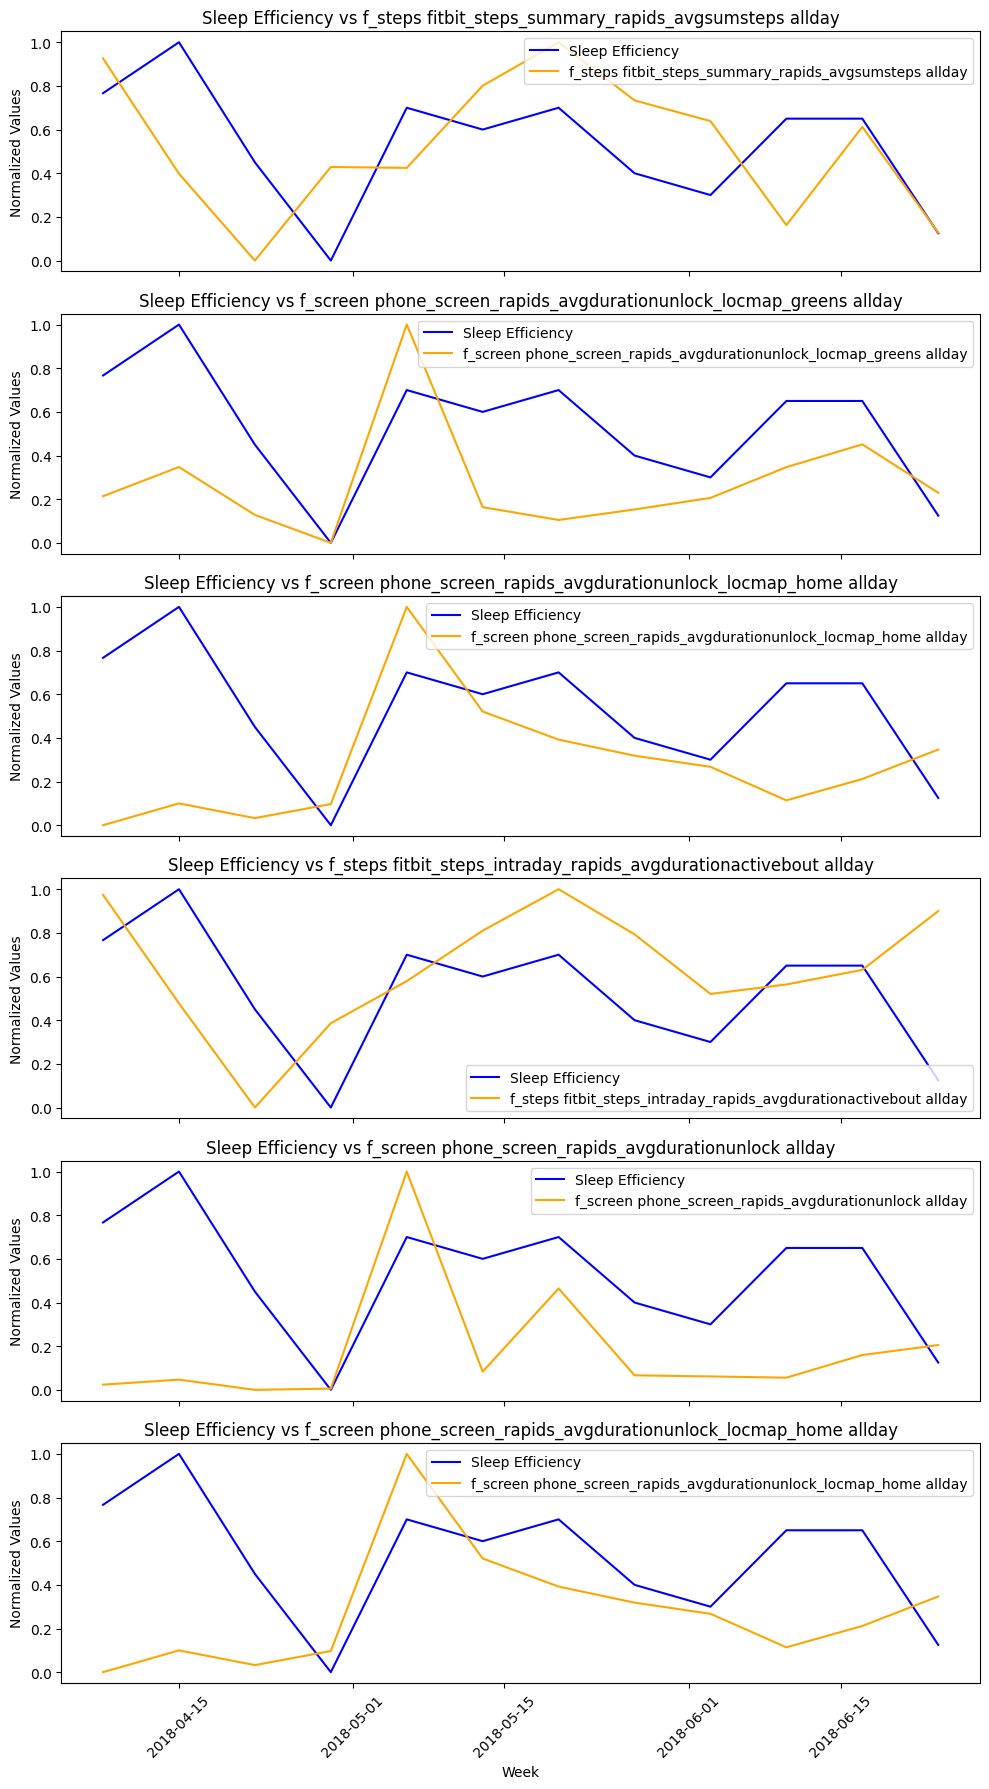

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to normalize data (min-max normalization)
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Assuming 'sleep_data' is your dataset, making a copy as per your request
sleep_data = df.copy()

# Filter data for the first 'pid'
pid_data = sleep_data[sleep_data['pid'] == sleep_data['pid'].iloc[100]]

# Define the top 6 features (provided)
top_6_features = [
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_greens:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday'
]

# Ensure 'date' column is in datetime format
pid_data['date'] = pd.to_datetime(pid_data['date'])

# Set 'date' as the index for resampling
pid_data.set_index('date', inplace=True)

# Set up the subplot (6 subplots, one for each feature)
fig, axs = plt.subplots(len(top_6_features), 1, figsize=(10, 18), sharex=True)

# Plot sleep efficiency along with each feature in the 6 subplots
for i, feature in enumerate(top_6_features):
    # Aggregate over weeks by taking the mean of sleep efficiency and each feature
    agg_pid_data = pid_data[[feature, 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday']].resample('W').mean()

    # Normalize both sleep efficiency and the feature
    agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'] = normalize(agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'])
    agg_pid_data[feature] = normalize(agg_pid_data[feature])

    # Plot sleep efficiency
    axs[i].plot(agg_pid_data.index, agg_pid_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'], label='Sleep Efficiency', color='blue')

    # Plot the corresponding feature
    axs[i].plot(agg_pid_data.index, agg_pid_data[feature], label=feature.replace(':', ' '), color='orange')

    # Set title and labels
    axs[i].set_title(f'Sleep Efficiency vs {feature.replace(":", " ")}')
    axs[i].set_ylabel('Normalized Values')
    axs[i].legend()

# Set common x-axis label
plt.xlabel('Week')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define relevant features (activity, screen time, etc.)
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
]

# Initialize a dictionary to store results
results = {}
mse_list = []
mae_list = []

# Iterate over each participant (pid)
for pid in sleep_data['pid'].unique():
    # Filter the data for the current participant
    subject_data = sleep_data[sleep_data['pid'] == pid].sort_values(by='date')

    # Filter out rows with missing values for the selected features
    subject_data = subject_data.dropna(subset=selected_features)

    if len(subject_data) < 5:
        # Skip participants with too little data
        print(f"Skipping PID {pid} due to insufficient data")
        continue

    # Define X (features) and y (target)
    X = subject_data[selected_features]
    y = subject_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday']

    # Split data into 98% training and 2% testing (temporal order)
    train_size = int(0.98 * len(subject_data))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Train the Decision Tree model
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE) and Mean Absolute Error (MAE)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Save the result for this participant
    results[pid] = {'MSE': mse, 'MAE': mae}

    # Append MSE and MAE to lists for averaging later
    mse_list.append(mse)
    mae_list.append(mae)

    # Output result for the participant


# Print final result

# Calculate the average MSE and MAE across all participants
average_mse = np.mean(mse_list)
average_mae = np.mean(mae_list)

# Print the averages
print(f"\nAverage MSE across all participants: {average_mse}")
print(f"Average MAE across all participants: {average_mae}")



Average MSE across all participants: 8.74625
Average MAE across all participants: 1.5925


In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define relevant features (activity, screen time, etc.)
selected_features = [
    'f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday',
    'f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock:allday',
    'f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday',
]

# Initialize a dictionary to store results
results = {}
deviation_mse_list = []  # To store MSEs for days where sleep efficiency deviation is >= 2
deviation_days_data = []  # To store the days and data points for large deviations

# Iterate over each participant (pid)
for pid in sleep_data['pid'].unique():
    # Filter the data for the current participant
    subject_data = sleep_data[sleep_data['pid'] == pid].sort_values(by='date')

    # Filter out rows with missing values for the selected features
    subject_data = subject_data.dropna(subset=selected_features)

    if len(subject_data) < 5:
        # Skip participants with too little data
        print(f"Skipping PID {pid} due to insufficient data")
        continue

    # Calculate sleep efficiency difference from the previous day
    subject_data['sleep_efficiency_diff'] = subject_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday'].diff()

    # Define X (features) and y (target)
    X = subject_data[selected_features]
    y = subject_data['f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:allday']

    # Split data into 98% training and 2% testing (temporal order)
    train_size = int(0.70 * len(subject_data))
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # Train the Decision Tree model
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Find test days where sleep efficiency deviation from the previous day is >= 2
    test_data = subject_data.iloc[train_size:]  # The corresponding part of the test data
    deviation_days = test_data[test_data['sleep_efficiency_diff'].abs() >= 2]

    # If there are days with large deviation, calculate the MSE for those specific points
    if not deviation_days.empty:
        # Get the relative indices for the deviation days
        relative_indices = deviation_days.index - test_data.index[0]

        # Calculate MSE for these specific points
        mse_deviation = mean_squared_error(y_test.iloc[relative_indices], y_pred[relative_indices])
        deviation_mse_list.append(mse_deviation)

        # Store the corresponding relative test rows for further averaging
        deviation_days_data.append(X_test.iloc[relative_indices])

    # Evaluate the overall model using Mean Squared Error (MSE) and Mean Absolute Error (MAE)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Save the result for this participant
    results[pid] = {'MSE': mse, 'MAE': mae}

    # Output result for the participant


# Print final results


# Calculate the average MSE for points where the sleep efficiency deviation from the previous day was >= 2
if deviation_mse_list:
    avg_deviation_mse = np.mean(deviation_mse_list)
    print(f"\nAverage MSE for points with sleep efficiency deviation >= 2: {avg_deviation_mse}")

# If there are data points for large deviation days, concatenate and calculate the average of those days
if deviation_days_data:
    deviation_days_df = pd.concat(deviation_days_data)
    average_large_deviation_days = deviation_days_df.mean()
    print(f"\nAverage of large deviation days (features):\n{average_large_deviation_days}")
else:
    print("No large deviation days were found.")
all_mse = [score['MSE'] for pid, score in results.items()]
all_mae = [score['MAE'] for pid, score in results.items()]

# Calculate the average MSE and MAE
average_mse_all = np.mean(all_mse)
average_mae_all = np.mean(all_mae)

# Print the average MSE and MAE
print(f"Average MSE across all participants: {average_mse_all}")
print(f"Average MAE across all participants: {average_mae_all}")



Average MSE for points with sleep efficiency deviation >= 2: 32.227664735558996

Average of large deviation days (features):
f_steps:fitbit_steps_summary_rapids_avgsumsteps:allday               9390.878657
f_steps:fitbit_steps_intraday_rapids_avgdurationactivebout:allday       3.243200
f_screen:phone_screen_rapids_avgdurationunlock:allday                   5.366383
f_screen:phone_screen_rapids_avgdurationunlock_locmap_home:allday       6.226895
dtype: float64
Average MSE across all participants: 21.57764996669044
Average MAE across all participants: 2.232899609448522
